In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [92]:
sales_of_company_x = pd.read_csv("Series\monthly-sales-of-company-x-jan-6.csv")['Count']
robberies_in_boston = pd.read_csv("Series\monthly-boston-armed-robberies-j.csv")['Count']
airlines_passengers = pd.read_csv("Series\international-airline-passengers.csv")['Count']
mean_monthly_temp = pd.read_csv("Series\mean-monthly-air-temperature-deg.csv")['Deg']
dowjones_closing = pd.read_csv("Series\weekly-closings-of-the-dowjones-.csv")['Close']
female_births = pd.read_csv("Series\daily-total-female-births-in-cal.csv")['Count']

**1. Анализируем monthly-sales-of-company-x-jan-6**

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


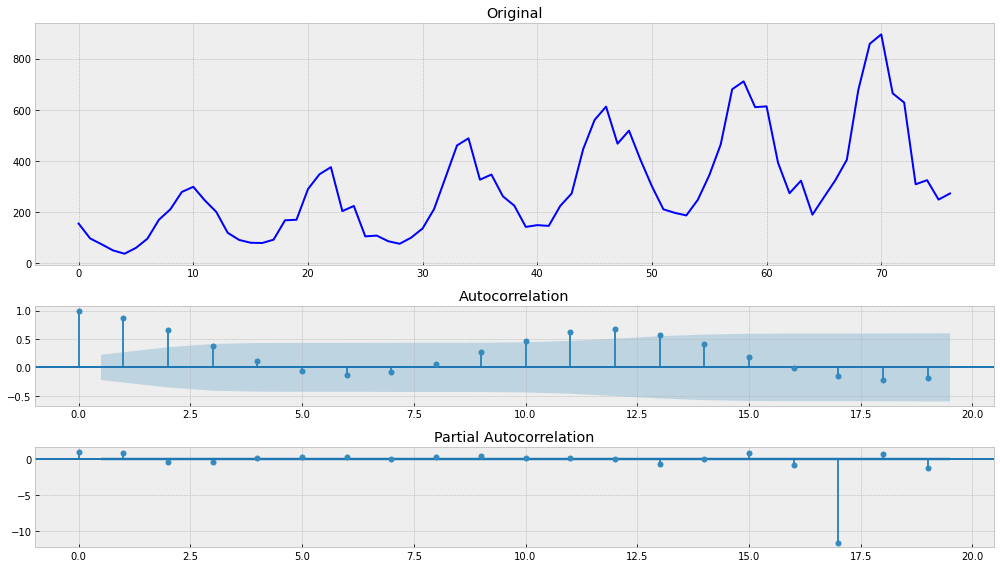

In [34]:
tsplot(sales_of_company_x)

Убираем изменение дисперсии

In [35]:
sales_of_company_x = boxcox(sales_of_company_x, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


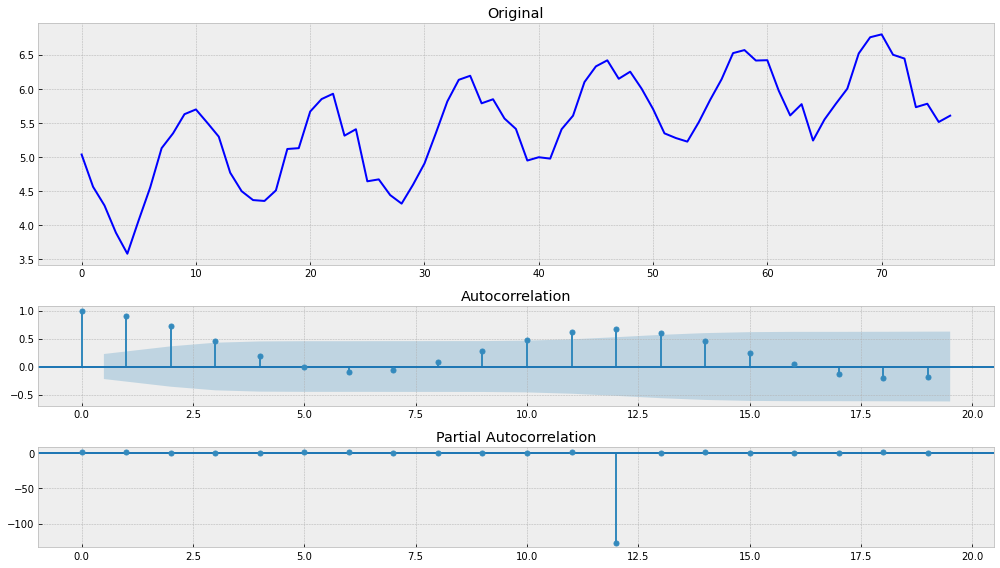

In [36]:
tsplot(sales_of_company_x)

Убираем тренд

In [37]:
sales_of_company_x = sales_of_company_x[1:] - sales_of_company_x[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


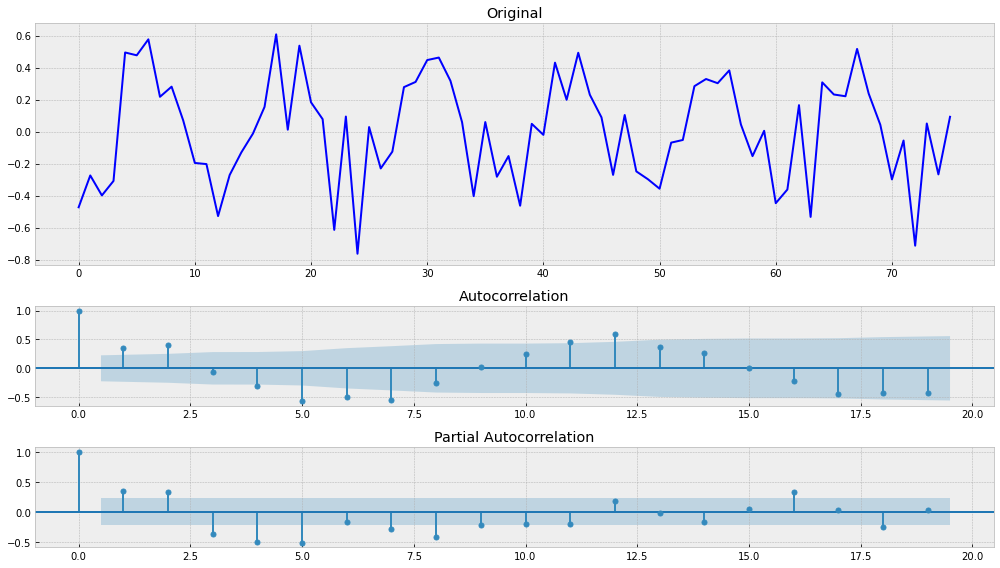

In [38]:
tsplot(sales_of_company_x)

Убираем сезонность

In [39]:
sales_of_company_x = sales_of_company_x[24:] - sales_of_company_x[:-24]

Results of Dickey-Fuller Test:
Test Statistic                -9.978030e+00
p-value                        2.151489e-17
#Lags Used                     0.000000e+00
Number of Observations Used    5.100000e+01
Critical Value (1%)           -3.565624e+00
Critical Value (5%)           -2.920142e+00
Critical Value (10%)          -2.598015e+00
dtype: float64


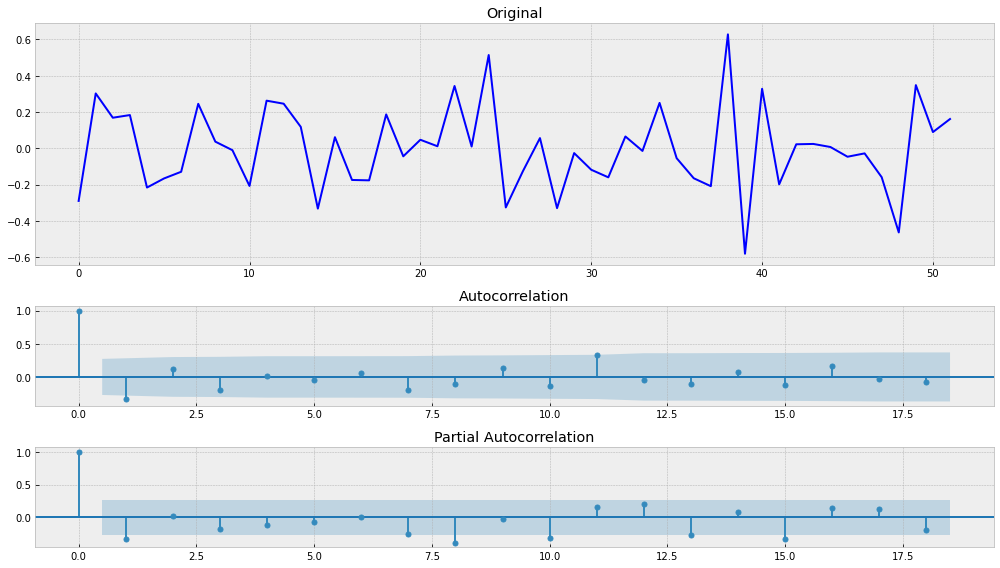

In [40]:
tsplot(sales_of_company_x)

**2. Анализируем monthly-boston-armed-robberies-j**

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


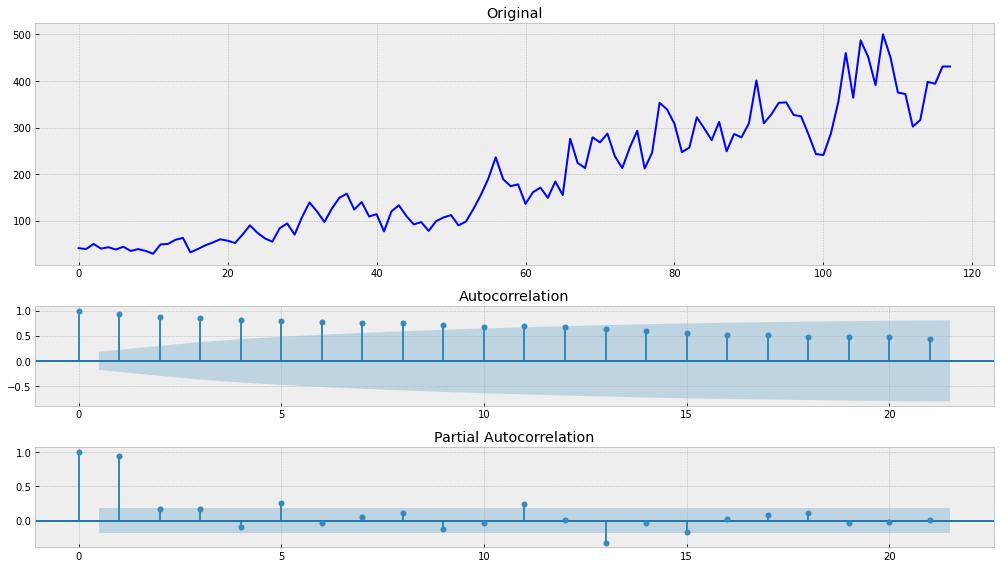

In [41]:
tsplot(robberies_in_boston)

Убираем изменение дисперсии

In [45]:
robberies_in_boston = boxcox(robberies_in_boston, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


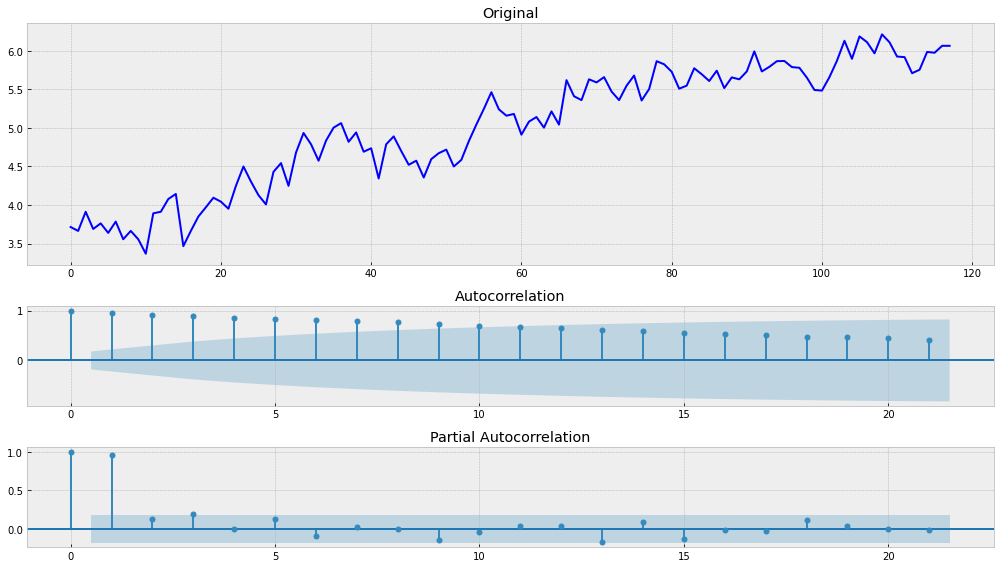

In [46]:
tsplot(robberies_in_boston)

Убираем тренд

In [47]:
robberies_in_boston = robberies_in_boston[1:] - robberies_in_boston[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


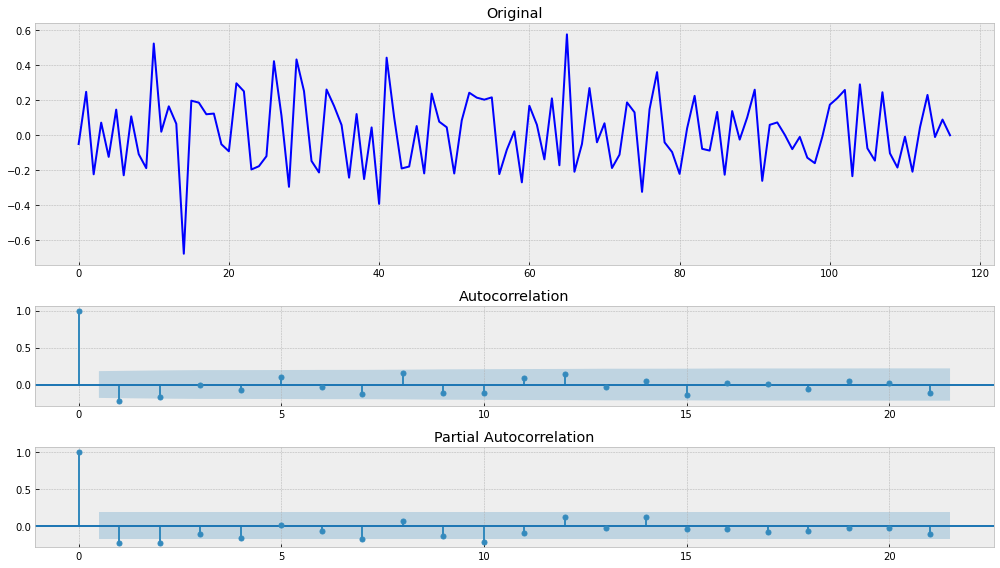

In [48]:
tsplot(robberies_in_boston)

**3. Анализируем international-airline-passengers**

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


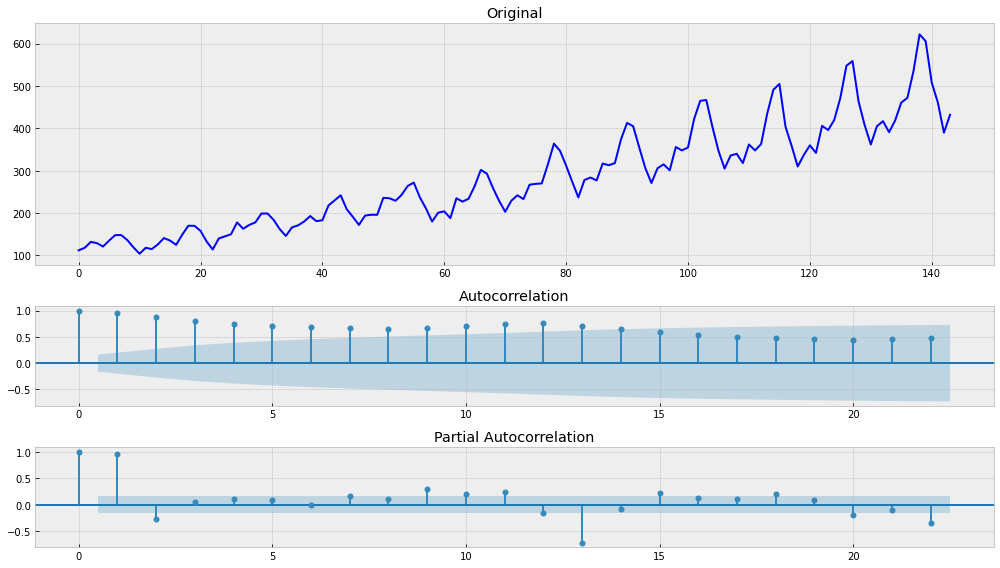

In [49]:
tsplot(airlines_passengers)

Убираем изменение дисперсии

In [50]:
airlines_passengers = boxcox(airlines_passengers, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


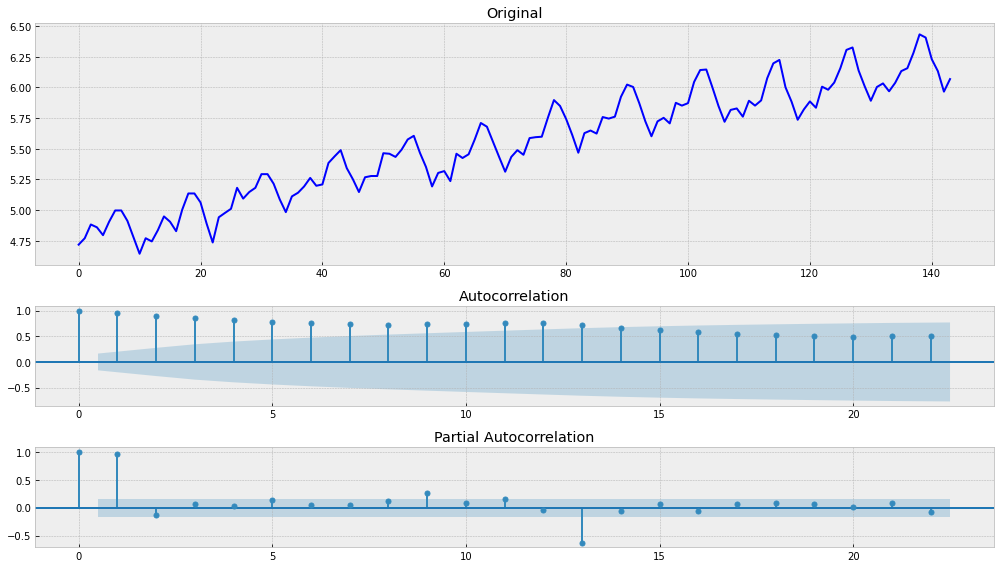

In [51]:
tsplot(airlines_passengers)

Убираем тренд

In [52]:
airlines_passengers = airlines_passengers[1:] - airlines_passengers[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


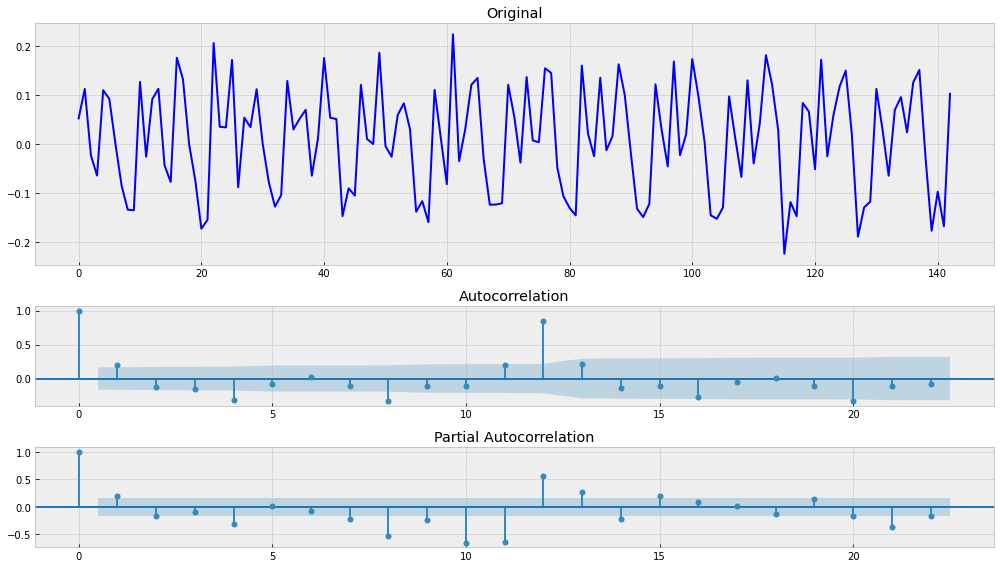

In [53]:
tsplot(airlines_passengers)

Убираем сезонность

In [54]:
airlines_passengers = airlines_passengers[12:] - airlines_passengers[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


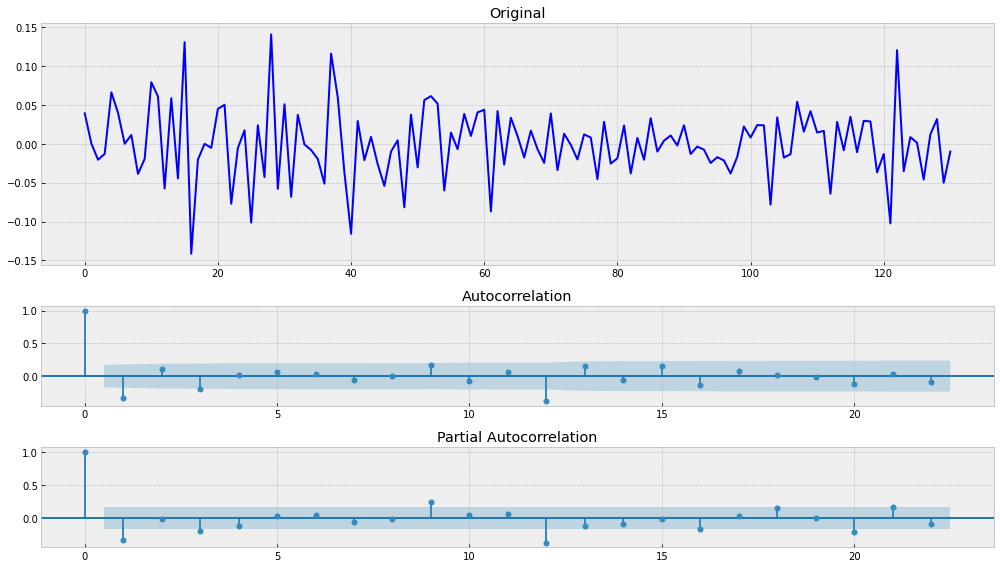

In [55]:
tsplot(airlines_passengers)

**4. Анализируем mean-monthly-air-temperature-deg**

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


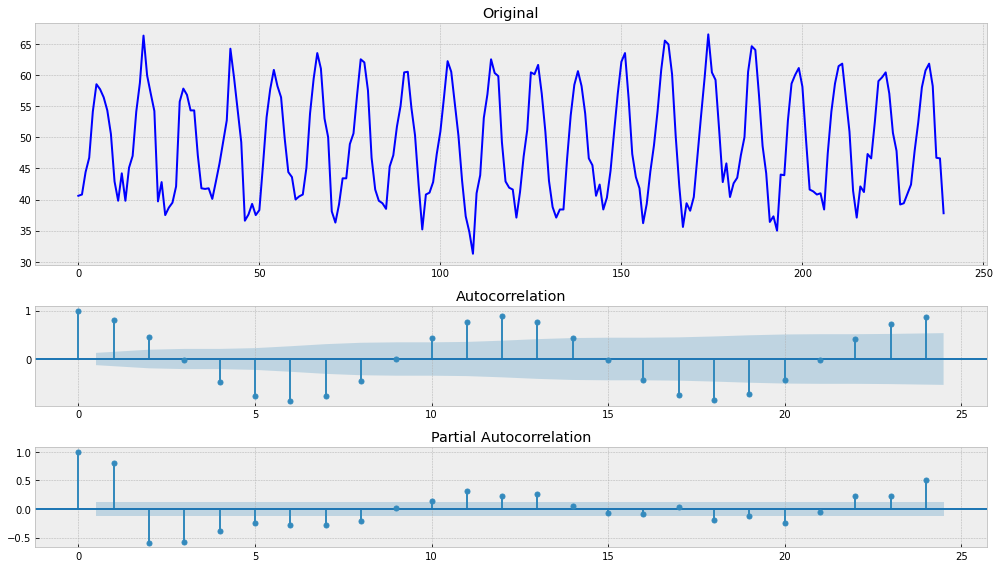

In [93]:
tsplot(mean_monthly_temp)

Убираем сезонность

In [94]:
mean_monthly_temp = mean_monthly_temp.to_numpy()
mean_monthly_temp1 = pd.Series(mean_monthly_temp[12:] - mean_monthly_temp[:-12])

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


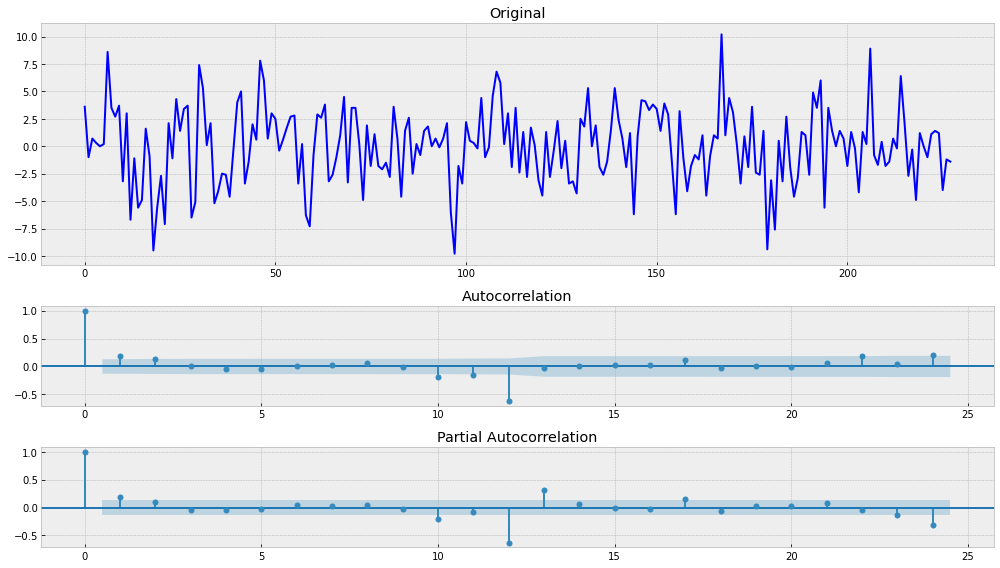

In [95]:
tsplot(mean_monthly_temp1)

**5. Анализируем weekly-closings-of-the-dowjones-**

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


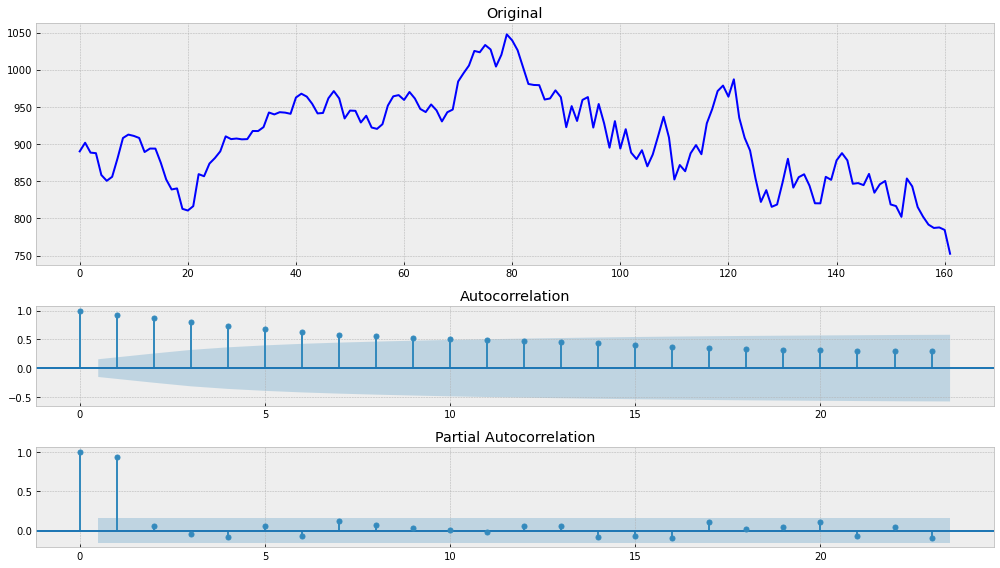

In [96]:
tsplot(dowjones_closing)

Убираем сезонность (5-дневная неделя на бирже)

In [97]:
dowjones_closing = dowjones_closing.to_numpy()
dowjones_closing1 = pd.Series(dowjones_closing[5:] - dowjones_closing[:-5])

Results of Dickey-Fuller Test:
Test Statistic                  -3.668879
p-value                          0.004573
#Lags Used                      13.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


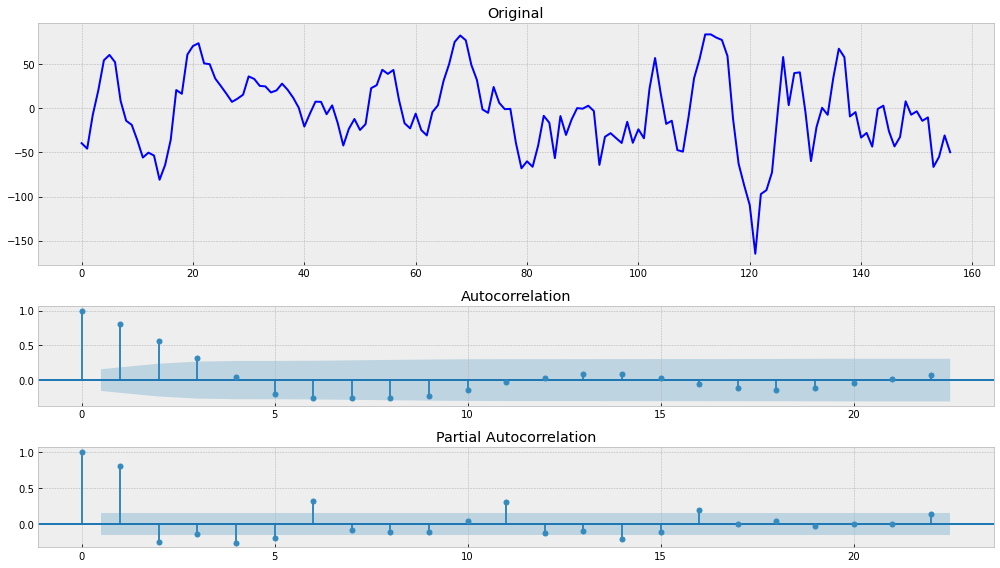

In [98]:
tsplot(dowjones_closing1)

**6. Анализируем daily-total-female-births-in-cal**

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


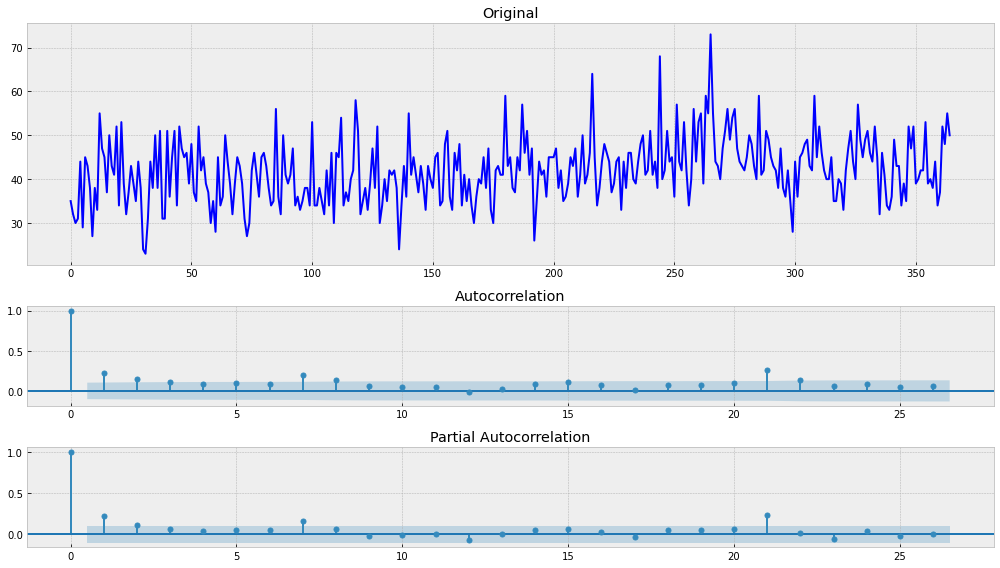

In [99]:
tsplot(female_births)

Убираем сезонность (7 дней)

In [100]:
female_births = female_births.to_numpy()
female_births1 = pd.Series(female_births[7:] - female_births[:-7])

Results of Dickey-Fuller Test:
Test Statistic                -8.316786e+00
p-value                        3.662540e-13
#Lags Used                     1.400000e+01
Number of Observations Used    3.430000e+02
Critical Value (1%)           -3.449560e+00
Critical Value (5%)           -2.870004e+00
Critical Value (10%)          -2.571279e+00
dtype: float64


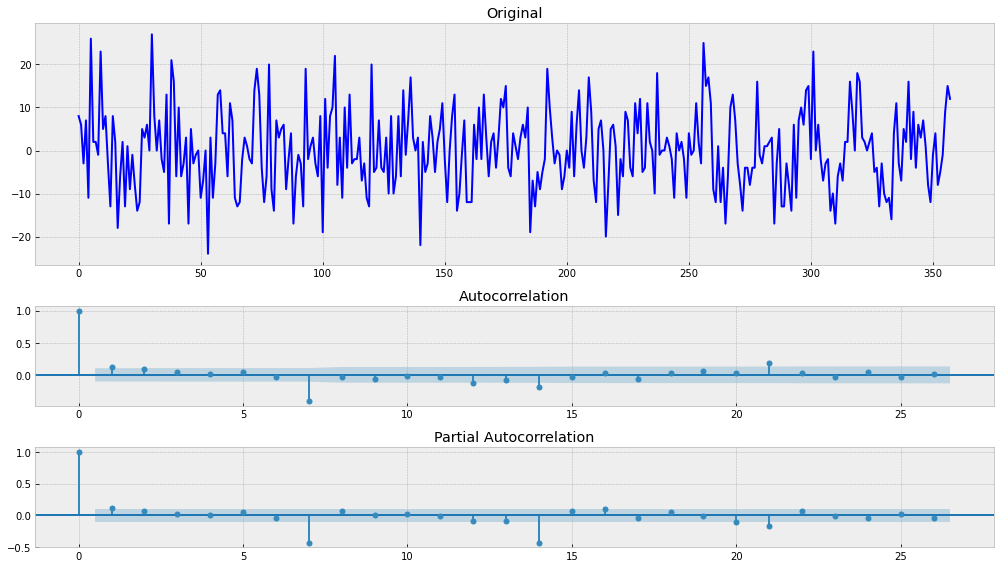

In [101]:
tsplot(female_births1)